Enter the number of frames: 5
Enter the reference string: 3 8 2 3 9 1 6 3 9 6 2 1 3
    String  frame1 frame2 frame3 frame4 frame5 Fault
0        3       3      -      -      -      -   Yes
1        8       3      8      -      -      -   Yes
2        2       3      8      2      -      -   Yes
3        3       3      8      2      -      -    No
4        9       3      8      2      9      -   Yes
5        1       3      8      2      9      1   Yes
6        6       6      8      2      9      1   Yes
7        3       6      3      2      9      1   Yes
8        9       6      3      2      9      1    No
9        6       6      3      2      9      1    No
10       2       6      3      2      9      1    No
11       1       6      3      2      9      1    No
12       3       6      3      2      9      1    No

Total requests: 13
Total Page Faults: 7
Fault Rate: 53.85%
Time:  0.0018758459991659038
    String  frame1 frame2 frame3 frame4 frame5 Fault
0        3       3      -      -

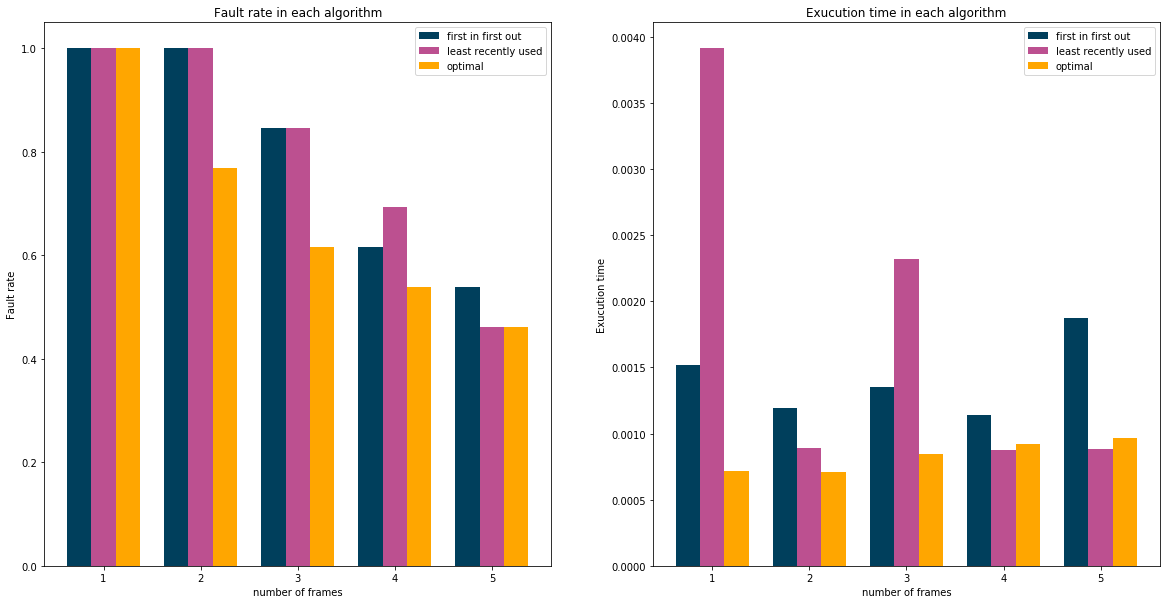

the best approach for fifo is frame : 5 fault rate : 0.5385 and time : 0.0019
the best approach for lru is frame : 5 fault rate : 0.4615 and time : 0.0009
the best approach for opt is frame : 5 fault rate : 0.4615 and time : 0.0010
the overall best approach is algorithm : lru frame : 5 fault rate : 0.4615 and time : 0.0009


In [95]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 18 15:56:08 2020

@author: vishvapatel 18bce260 hitanshushah 18bce217 vyomshah 18bce221
"""

import timeit
import matplotlib.pyplot as plt
import pandas as p
import numpy as np


def main():
    print("Enter the number of frames: ",end="")
    no_frames = int(input())
    print("Enter the reference string: ",end="")
    page_list = list(map(int,input().strip().split()))
    fifolist=fifopra(no_frames,page_list)
    lrulist=lrupra(no_frames,page_list)
    optlist=optpra(no_frames,page_list)
    plotdata(fifolist,lrulist,optlist,no_frames)
    optimal(fifolist,lrulist,optlist,no_frames)

    
    

def optimal(fifolist,lrulist,optlist,no_frames):
    sumfifo={}
    sumlru={}
    sumopt={}
    sumtot={}
    for i in range(no_frames):
        framestr=i+1
        sf=fifolist[i][0]+fifolist[i][1]
        sl=lrulist[i][0]+lrulist[i][1]
        so=optlist[i][0]+optlist[i][1]
        sumfifo.update({framestr:[fifolist[i][0],fifolist[i][1],sf]})
        sumlru.update({framestr:[lrulist[i][0],lrulist[i][1],sl]})
        sumopt.update({framestr:[optlist[i][0],optlist[i][1],so]})
        if sf<sl and sf<so:
            sumtot.update({"fifo":[framestr,fifolist[i][0],fifolist[i][1],sf]})
        elif sl<so and sl<sf:
            sumtot.update({"lru":[framestr,lrulist[i][0],lrulist[i][1],sl]})
        else:
            sumtot.update({"opt":[framestr,optlist[i][0],optlist[i][1],so]})
            
    alg=''
    for i in range(4):
        min=1000
        frame=0
        faultrate=0
        time=0
        if i < 3:
            if i==0:
                for a,b in sumfifo.items():
                    if b[2]<min:
                        min=b[2]
                        frame=a
                        faultrate=b[0]
                        time=b[1]
                print("the best approach for fifo is frame : {} fault rate : {:.4f} and time : {:.4f}".format(frame,faultrate,time))
            elif i==1:
                for a,b in sumlru.items():
                    if b[2]<min:
                        min=b[2]
                        frame=a
                        faultrate=b[0]
                        time=b[1]
                print("the best approach for lru is frame : {} fault rate : {:.4f} and time : {:.4f}".format(frame,faultrate,time))
            else:
                for a,b in sumopt.items():
                    if b[2]<min:
                        min=b[2]
                        frame=a
                        faultrate=b[0]
                        time=b[1]
                print("the best approach for opt is frame : {} fault rate : {:.4f} and time : {:.4f}".format(frame,faultrate,time))
        if i==3:
            for a,b in sumtot.items():
                if b[3]<min:
                    min=b[3]
                    frame=b[0]
                    faultrate=b[1]
                    time=b[2]
                    alg=a
            print("the overall best approach is algorithm : {} frame : {} fault rate : {:.4f} and time : {:.4f}".format(alg,frame,faultrate,time))


def fifopra(no_frames,page_list):
    retlist=[]
    for t in range(1,no_frames+1):
        start = timeit.default_timer()
        f,fault,top,pf = [],0,0,'No'
        tab_val=[]
        col_label=['String']
        for i in range(t):
            string='frame'+str(i+1)
            col_label.append(string)
        col_label.append('Fault')
        for i in page_list:
            temp=[]
            if i not in f:
                if len(f)<t:
                    f.append(i)
                else:
                    f[top] = i
                    top = (top+1)%t
                fault += 1
                pf = 'Yes'
            else:
                pf = 'No'
            temp.append(i)
            for x in f:
                temp.append(x)
            for x in range(t-len(f)):
                temp.append('-')
            temp.append(pf)
            tab_val.append(temp)
        table=p.DataFrame(columns=col_label,data=tab_val)
        stop = timeit.default_timer()
        if t==no_frames:
            print(table)
            print("\nTotal requests: %d\nTotal Page Faults: %d\nFault Rate: %0.2f%%"%(len(page_list),fault,(fault/len(page_list))*100))
            print('Time: ', stop - start)
        retlist.append((fault/len(page_list),stop - start))
    return retlist
    
    
    
def lrupra(no_frames,page_list):
    retlist=[]
    for t in range(1,no_frames+1):
        start = timeit.default_timer()
        f,st,fault,pf = [],[],0,'No'
        tab_val=[]
        col_label=['String']
        for i in range(t):
            string='frame'+str(i+1)
            col_label.append(string)
        col_label.append('Fault')
        for i in page_list:
            temp=[]
            if i not in f:
                if len(f)<t:
                    f.append(i)
                    st.append(len(f)-1)
                else:
                    ind = st.pop(0)
                    f[ind] = i
                    st.append(ind)
                pf = 'Yes'
                fault += 1
            else:
                st.append(st.pop(st.index(f.index(i))))
                pf = 'No'
            temp.append(i)
            for x in f:
                temp.append(x)
            for x in range(t-len(f)):
                temp.append('-')
            temp.append(pf)
            tab_val.append(temp)
        table=p.DataFrame(columns=col_label,data=tab_val)
        stop = timeit.default_timer()
        if t==no_frames:
            print(table)
            print("\nTotal requests: %d\nTotal Page Faults: %d\nFault Rate: %0.2f%%"%(len(page_list),fault,(fault/len(page_list))*100))
            print('Time: ', stop - start)
        retlist.append((fault/len(page_list),stop - start))
    return retlist
    
    
    
def optpra(no_frames,page_list):
    retlist=[]
    for t in range(1,no_frames+1):
        start = timeit.default_timer()
        f,fault,pf = [],0,'No'
        tab_val=[]
        col_label=['String']
        for i in range(t):
            string='frame'+str(i+1)
            col_label.append(string)
        col_label.append('Fault')
        occurance = [None for i in range(t)]
        for i in range(len(page_list)):
            temp=[]
            if page_list[i] not in f:
                if len(f)<t:
                    f.append(page_list[i])
                else:
                    for x in range(len(f)):
                        if f[x] not in page_list[i+1:]:
                            f[x] = page_list[i]
                            break
                        else:
                            occurance[x] = page_list[i+1:].index(f[x])
                    else:
                        f[occurance.index(max(occurance))] = page_list[i]
                fault += 1
                pf = 'Yes'
            else:
                pf = 'No'
            temp.append(page_list[i])
            for x in f:
                temp.append(x)
            for x in range(t-len(f)):
                temp.append('-')
            temp.append(pf)
            tab_val.append(temp)
        table=p.DataFrame(columns=col_label,data=tab_val)
        stop = timeit.default_timer()
        if t==no_frames:
            print(table)
            print("\nTotal requests: %d\nTotal Page Faults: %d\nFault Rate: %0.2f%%"%(len(page_list),fault,(fault/len(page_list))*100))
            print('Time: ', stop - start)
        retlist.append((fault/len(page_list),stop - start))
    return retlist
    
    
def plotdata(fifolist,lrulist,optlist,no_frames):
    datarate=[[a[0] for a in fifolist],[b[0] for b in lrulist],[c[0] for c in optlist]]
    datatime=[[a[1] for a in fifolist],[b[1] for b in lrulist],[c[1] for c in optlist]]
    
    fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(4*no_frames,2*no_frames))
    
    width=0.33
    color_list = ['b', 'g', 'r']
    X=np.arange(no_frames)
    Xticks=[a+0.25 for a in X]
    Xtickslabels=[i+1 for i in range(no_frames)]
    
    
    ax[0].bar(X+0.00,datarate[0],width = 0.25,color = '#003f5c',label='first in first out')
    ax[0].bar(X+0.25,datarate[1],width = 0.25,color = '#bc5090',label='least recently used')
    ax[0].bar(X+0.50,datarate[2],width = 0.25,color = '#ffa600',label='optimal')
    
    ax[0].set_ylabel('Fault rate')
    ax[0].set_xlabel('number of frames')
    ax[0].set_title('Fault rate in each algorithm')
    ax[0].set_xticks(Xticks)
    ax[0].set_xticklabels(Xtickslabels)
    ax[0].legend()
    
    ax[1].bar(X+0.00,datatime[0],width = 0.25,color = '#003f5c',label='first in first out')
    ax[1].bar(X+0.25,datatime[1],width = 0.25,color = '#bc5090',label='least recently used')
    ax[1].bar(X+0.50,datatime[2],width = 0.25,color = '#ffa600',label='optimal')
    
    ax[1].set_ylabel('Exucution time')
    ax[1].set_xlabel('number of frames')
    ax[1].set_title('Exucution time in each algorithm')
    ax[1].set_xticks(Xticks)
    ax[1].set_xticklabels(Xtickslabels)
    ax[1].legend()
    
    plt.show()
    
    
if __name__=='__main__':
    main()